In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = 'https://raw.githubusercontent.com/chakra-ai/SentimentAnalysis/master/RomanUrduDataSet.csv'
df = pd.read_csv(url, encoding='utf8', header=None)
df.columns = ['text','target','junk']
df.drop('junk',axis=1, inplace=True)
df.dropna(inplace=True)
data = df[df['target'] != 'Neative']

# **Eliminate biased words are common across classes**

In [3]:
pos = df[df['target']=='Positive']['text'].values
neg = df[df['target']=='Negative']['text'].values
neu = df[df['target']=='Neutral']['text'].values

pos_corpus = []
neg_corpus = []
neu_corpus = []

for sentence in pos:
    words = sentence.split()
    pos_corpus = pos_corpus + words
pos_corpus = set(pos_corpus)

for sentence in neg:
    words = sentence.split()
    neg_corpus = neg_corpus + words
neg_corpus = set(neg_corpus)

for sentence in neu:
    words = sentence.split()
    neu_corpus = neu_corpus + words
neu_corpus = set(neu_corpus)

In [4]:
common_words = pos_corpus.intersection(neg_corpus, neu_corpus)
print(len(common_words))
print(common_words)

5387
{'baton', 'boly', 'aesa', 'bhutto', 'TO', 'baqaidah', 'akele', 'Prada', 'jadeed', 'tu', 'bna', 'review', 'laiq', 'km', 'KO', '😘', 'clear', 'bass', 'hisse', 'Ese', 'service', 'izat', 'release', 'Ibteda', 'nikal', 'Film', 'jazbati', 'lgy', 'kheelon', 'Guzishta', 'bot', 'company', 'moun', 'talba', 'Hukomat', 'Hukum', 'Muhammad', 'muqabla', 'lrki', 'championship', 'dosri', 'prta', 'mahaz', 'Government', 'guzare', 'andazah', 'larke', '1995', 'baji', 'Wali', 'Shehar', 'Maulana', 'nayi', 'Philippine', 'kray', 'chalana', 'be', 'eh', 'benul', 'deceleration', 'pir', 'saktay', 'badal', 'lout', 'khata', 'Afridi', 'krwana', 'Bukhari', '35', 'Mujhe', 'banker', 'Operation', 'dosra', 'Lollywood', 'check', 'sach', '/', 'ham', 'Aye', 'piano', 'Amin', 'likhi', 'Di', 'nikaal', 'pai', 'alla', 'BA', 'beti', 'like', 'kabhi', 'Hay', 'zulm', 'dy.', 'Asif', 'leather', 'Zia', 'Hahahahhaha', 'hai,', 'Hamain', 'Nae', 'also', 'pmln', 'ibtedai', 'ghar', 'Rashid', 'hairat', 'mar', 'aesy', 'beshtar', 'saab', 'aza

In [5]:
def clean_doc(doc):
    tokens = doc.split()
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    tokens = [re_punc.sub('',w) for w in tokens]
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if not word in common_words]
    tokens = [word.lower() for word in tokens]
    tokens = [word for word in tokens if len(word)>2]
    return tokens

In [6]:
#Get X and Y data
corpus = []
for i in range(data.shape[0]):
    review = data.iloc[:,0].values[i]
    review = clean_doc(review)
    review=' '.join(review)
    corpus.append(review)

X = np.array(corpus)

y = data.iloc[:,1].values

In [7]:
c_data = pd.DataFrame(X, columns=['text'])
c_data['label'] = y
c_data['char_len'] = c_data['text'].apply(lambda x: len(x) - x.count(" "))
c_data['word_count'] = c_data['text'].apply(lambda x: len(x.split(" ")))
c_data.shape

(20227, 4)

In [8]:
c_data.head(10)

,text,label,char_len,word_count
0,sai,Positive,3,1
1,,Positive,0,1
2,,Positive,0,1
3,,Positive,0,1
4,are wha,Positive,6,2
5,,Positive,0,1
6,wha khubiya,Positive,10,2
7,khubiya,Positive,7,1
8,,Positive,0,1
9,everyone allah swt hamesha lawzo zaat sub hey,Positive,38,8


In [9]:
c_data = c_data[(c_data['char_len'] > 3) & (c_data['word_count'] > 1)]
print(c_data.shape)
c_data.head(10)

(12491, 4)


,text,label,char_len,word_count
4,are wha,Positive,6,2
6,wha khubiya,Positive,10,2
9,everyone allah swt hamesha lawzo zaat sub hey,Positive,38,8
10,rab kreem reham watneaziz frmaamin,Positive,30,5
11,jaago coom jaago nokar humarey tex tankha paki...,Positive,54,10
12,sacha jany kese bdl sakta think nsl ase guzr jain,Positive,40,10
13,garip lati zulum lati,Positive,18,4
15,musalman phir dor jahalat jaraha hiyaday farma...,Positive,86,17
18,ase namil badl,Positive,12,3
22,muskurany rouny muskuraty loug hansi jalyn,Positive,37,6


In [10]:
c_data.label.value_counts()

Neutral     4467
Positive    4104
Negative    3920
Name: label, dtype: int64

# Cleaned Data with 3 Classes 'Positive', 'Negative', 'Neutral'

In [11]:
c_data_3 = c_data.copy()

In [12]:
vocab_3 = []
for sentence in c_data_3['text'].values:
  temp = sentence.split()
  vocab_3 = vocab_3 + temp
print('Total Vacab Size in the 3 Classes dataset is : {}'.format(len(set(vocab_3))))

Total Vacab Size in the 3 Classes dataset is : 28543


In [14]:
c_data_3.to_csv('set_3classes_clean.csv', header=True)

# Prepare the Data

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [105]:
y_3 = c_data_3['label'].values
enc = LabelEncoder()
y_3 = enc.fit_transform(y_3)

In [106]:
y_3.shape

(12491,)

In [107]:
c_data_3[['text', 'char_len', 'word_count']].shape

(12491, 3)

In [108]:
X_train, X_test, y_train, y_test = train_test_split(c_data_3[['text', 'char_len', 'word_count']],
                                                    y_3, 
                                                    test_size = 0.2,
                                                    random_state = 42,
                                                    stratify = y_3)

In [109]:
vectorizer = TfidfVectorizer() 
vectorizer = vectorizer.fit(X_train['text'])
x_train_v = vectorizer.transform(X_train['text'])
x_test_v = vectorizer.transform(X_test['text'])

In [110]:
X_train_v_3 = pd.concat([X_train[['char_len', 'word_count']].reset_index(drop=True),
                          pd.DataFrame(x_train_v.toarray())], axis=1)
X_test_v_3 = pd.concat([X_test[['char_len', 'word_count']].reset_index(drop=True),
                         pd.DataFrame(x_test_v.toarray())], axis=1)

In [111]:
# Shape of the Training data X and Y
print("Shape of the Training data X : {}, Y : {}".format(X_train_v_3.shape, y_train.shape))

Shape of the Training data X : (9992, 24530), Y : (9992,)


# n_jobs = -1 for building parallel 150 decision trees. 
# Max_depth = None means it will build decision tree until minminzation of loss
rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1,class_weight="balanced",random_state=42)
#rf = GaussianNB()
rf_model = rf.fit(X_train_v_3, y_train)
y_pred = rf_model.predict(X_test_v_3)

precision = precision_score(y_test, y_pred, pos_label='positive', average='weighted')
recall = recall_score(y_test, y_pred, pos_label='positive', average='weighted')
accuracy = accuracy_score(y_test, y_pred)

print('Precision: {:.2f} | Recall: {:.2f} | Accuracy: {:.2f}'.format(precision,recall,accuracy))

sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix(y_test, y_pred), cmap="Blues", annot=True,annot_kws={"size": 14}, fmt='g')# font size

In [49]:
import pandas as pd
import numpy as np
from sklearn import ensemble
from sklearn import metrics
from sklearn import model_selection

In [62]:
vectorizer = TfidfVectorizer(max_features=2000) 
vectorizer = vectorizer.fit(c_data_3['text'])
x_text = vectorizer.transform(c_data_3['text'])

In [63]:
X = pd.concat([c_data_3[['char_len', 'word_count']].reset_index(drop=True),
                          pd.DataFrame(x_text.toarray())], axis=1)

In [64]:
X.shape

(12491, 2002)

In [65]:
y_3 = c_data_3['label'].values
enc = LabelEncoder()
y = enc.fit_transform(y_3)

In [66]:
y.shape

(12491,)

In [67]:
classifier = ensemble.RandomForestClassifier(n_jobs=-1)

In [68]:
param_grid = {
    "n_estimators" : [100, 200, 300, 400],
    "max_depth" : [1, 3, 5, 7], 
    "criterion" : ['gini', 'entropy'],
}

In [69]:
model = model_selection.GridSearchCV(
    estimator=classifier,
    param_grid=param_grid,
    scoring = 'accuracy',
    verbose=0,
    n_jobs = 1,
    cv = 5,
)

In [28]:
model.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False,
                                              random_

In [29]:
model.best_score_

0.3873194754282817

In [30]:
model.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [31]:
# Trials with Random Search CV

In [70]:
param_grid = {
    "n_estimators" : [300, 200],
    "max_depth" : np.arange(40, 80), 
    "criterion" : ['gini', 'entropy'],
}

In [71]:
model = model_selection.RandomizedSearchCV(
    estimator=classifier,
    param_distributions=param_grid,
    n_iter = 10,
    scoring = 'accuracy',
    verbose=10,
    n_jobs = 1,
    cv = 5,
)

In [72]:
model.fit(X, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=200, max_depth=73, criterion=gini ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, max_depth=73, criterion=gini, score=0.451, total=   5.1s
[CV] n_estimators=200, max_depth=73, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.0s remaining:    0.0s


[CV]  n_estimators=200, max_depth=73, criterion=gini, score=0.458, total=   4.9s
[CV] n_estimators=200, max_depth=73, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.9s remaining:    0.0s


[CV]  n_estimators=200, max_depth=73, criterion=gini, score=0.467, total=   5.2s
[CV] n_estimators=200, max_depth=73, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   15.2s remaining:    0.0s


[CV]  n_estimators=200, max_depth=73, criterion=gini, score=0.492, total=   5.2s
[CV] n_estimators=200, max_depth=73, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   20.4s remaining:    0.0s


[CV]  n_estimators=200, max_depth=73, criterion=gini, score=0.472, total=   4.9s
[CV] n_estimators=300, max_depth=54, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   25.3s remaining:    0.0s


[CV]  n_estimators=300, max_depth=54, criterion=gini, score=0.453, total=   5.5s
[CV] n_estimators=300, max_depth=54, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   30.8s remaining:    0.0s


[CV]  n_estimators=300, max_depth=54, criterion=gini, score=0.451, total=   5.6s
[CV] n_estimators=300, max_depth=54, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   36.4s remaining:    0.0s


[CV]  n_estimators=300, max_depth=54, criterion=gini, score=0.457, total=   6.1s
[CV] n_estimators=300, max_depth=54, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   42.6s remaining:    0.0s


[CV]  n_estimators=300, max_depth=54, criterion=gini, score=0.479, total=   6.0s
[CV] n_estimators=300, max_depth=54, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   48.6s remaining:    0.0s


[CV]  n_estimators=300, max_depth=54, criterion=gini, score=0.461, total=   6.0s
[CV] n_estimators=300, max_depth=78, criterion=entropy ...............
[CV]  n_estimators=300, max_depth=78, criterion=entropy, score=0.447, total=   7.7s
[CV] n_estimators=300, max_depth=78, criterion=entropy ...............
[CV]  n_estimators=300, max_depth=78, criterion=entropy, score=0.466, total=   8.0s
[CV] n_estimators=300, max_depth=78, criterion=entropy ...............
[CV]  n_estimators=300, max_depth=78, criterion=entropy, score=0.464, total=   7.6s
[CV] n_estimators=300, max_depth=78, criterion=entropy ...............
[CV]  n_estimators=300, max_depth=78, criterion=entropy, score=0.495, total=   8.1s
[CV] n_estimators=300, max_depth=78, criterion=entropy ...............
[CV]  n_estimators=300, max_depth=78, criterion=entropy, score=0.475, total=   7.8s
[CV] n_estimators=300, max_depth=71, criterion=entropy ...............
[CV]  n_estimators=300, max_depth=71, criterion=entropy, score=0.446, tot

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.9min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [60]:
model.best_score_

0.4639351977780704

In [61]:
model.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 63,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# Cleaned Data with 2 Classes 'Positive', 'Negative'

In [102]:
c_data_2 = c_data[c_data['label'].isin(['Positive', 'Negative'])]
c_data_2.label.value_counts()

Positive    4104
Negative    3920
Name: label, dtype: int64

In [103]:
vocab_2 = []
for sentence in c_data_2['text'].values:
  temp = sentence.split()
  vocab_2 = vocab_2 + temp
print('Total Vacab Size in the 2 Classes dataset is : {}'.format(len(set(vocab_2))))

Total Vacab Size in the 2 Classes dataset is : 21674


# Cleaned Data with 2 Classes 'Positive' and 'Neutral'

In [124]:
c_data_2_pneu = c_data[c_data['label'].isin(['Positive', 'Neutral'])]
c_data_2_pneu.label.value_counts()

Neutral     4467
Positive    4104
Name: label, dtype: int64

# Cleaned Data with 2 Classes 'Negative' and 'Neutral'

In [125]:
c_data_2_nneu = c_data[c_data['label'].isin(['Negative', 'Neutral'])]
c_data_2_nneu.label.value_counts()

Neutral     4467
Negative    3920
Name: label, dtype: int64

# Random Forest with 2 Classes

In [147]:
y_2 = c_data_2_nneu['label'].values
enc = LabelEncoder()
y_2 = enc.fit_transform(y_2)

In [148]:
y_2.shape

(8387,)

In [149]:
c_data_2_nneu[['text', 'char_len', 'word_count']].shape

(8387, 3)

In [150]:
X_train, X_test, y_train, y_test = train_test_split(c_data_2_nneu[['text', 'char_len', 'word_count']],
                                                    y_2, 
                                                    test_size = 0.2,
                                                    random_state = 42,
                                                    stratify = y_2)

In [151]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2)) 
vectorizer = vectorizer.fit(X_train['text'])
x_train_v = vectorizer.transform(X_train['text'])
x_test_v = vectorizer.transform(X_test['text'])

In [152]:
X_train_v_2 = pd.concat([X_train[['char_len', 'word_count']].reset_index(drop=True),
                          pd.DataFrame(x_train_v.toarray())], axis=1)
X_test_v_2 = pd.concat([X_test[['char_len', 'word_count']].reset_index(drop=True),
                         pd.DataFrame(x_test_v.toarray())], axis=1)

In [153]:
# Shape of the Training data X and Y
print("Shape of the Training data X : {}, Y : {}".format(X_train_v_2.shape, y_train.shape))

Shape of the Training data X : (6709, 39379), Y : (6709,)


Precision: 0.66 | Recall: 0.73 | Accuracy: 0.66


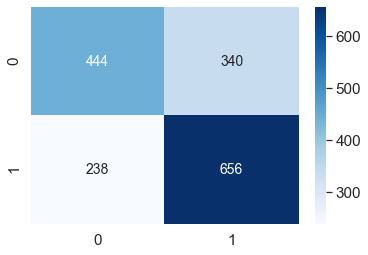

In [143]:
# n_jobs = -1 for building parallel 150 decision trees. 
# Max_depth = None means it will build decision tree until minminzation of loss
rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1,class_weight="balanced",random_state=42)
rf_model = rf.fit(X_train_v_2, y_train)
y_pred = rf_model.predict(X_test_v_2)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Precision: {:.2f} | Recall: {:.2f} | Accuracy: {:.2f}'.format(precision,recall,accuracy))

sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix(y_test, y_pred), cmap="Blues", annot=True,annot_kws={"size": 14}, fmt='g')# font size

# Naive Bayes Algorithm

In [144]:
from sklearn.naive_bayes import GaussianNB

Precision: 0.73 | Recall: 0.79 | Accuracy: 0.73


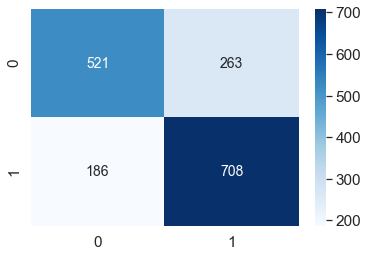

In [145]:
gnb = GaussianNB()
gnb_model = gnb.fit(X_train_v_2, y_train)
y_pred = gnb_model.predict(X_test_v_2)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Precision: {:.2f} | Recall: {:.2f} | Accuracy: {:.2f}'.format(precision,recall,accuracy))

sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix(y_test, y_pred), cmap="Blues", annot=True,annot_kws={"size": 14}, fmt='g')# font size

In [154]:
from sklearn.multiclass import OneVsRestClassifier

In [155]:
# define model
model = GaussianNB()
# define the ovr strategy
ovr = OneVsRestClassifier(model)
# fit model
ovr.fit(X_train_v_2, y_train)
# make predictions
yhat = ovr.predict(X_test_v_2)

In [156]:
accuracy = accuracy_score(y_test, yhat)

In [157]:
accuracy

0.732419547079857

In [ ]:
statement = 'Negative'